In [24]:
# Utilizamos JupyterLab para simular un perceptron.
# El perceptron tendrá 8 entradas de atributos y una salida.
# Vamos a "entrenar" los pesos del perceptron para un dataset con 8 atributos y una clase.



# Instalacion de paquetes y dependencias (esto debe ejecutarse en el terminal)
# pip install keras
# pip install tensorflow
# pip install numpy
# pip install scipy

# De todas formas, si esta con ANACONDA, sugiero instalar tensorflow desde la aplicación anaconda. 
# Si numpy y scipy no están instaladas, hacerlo via anaconda.

In [1]:
# Carga de paquetes y dependencias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

/Users/MAValle/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/MAValle/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/MAValle/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/MAValle/anaconda3/lib/python3.7/site-packages/tensorflow/python/frame

In [2]:
# carga de los datos
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Context:
# This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
# The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain 
# diagnostic measurements included in the dataset. Several constraints were placed on the selection of these 
# instances from a larger database. In particular, all patients here are females at least 21 years old of Pima 
# Indian heritage.

# Content:
# The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor 
# variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Acknowledgements
# Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning 
# algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications 
# and Medical Care (pp. 261--265). IEEE Computer Society Press.

# Clase:
# Y = {0,1} =  {sin diabetes, diabetes}

#dataset = np.loadtxt('pima_dataset.csv', delimiter=',')
dataset = np.genfromtxt("pima_dataset.csv", delimiter=",", skip_header=1) # sin cargar header

In [3]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [4]:
# seleccionamos los atributos de entrada X  y la clase Y

X = dataset[:, 0:8]
Y = dataset[:, 8]

In [14]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [5]:
# Ahora creamos el modelo y agregamos el perceptron, es cual es una Dense layer

model = Sequential()

#model.add(Dense())
#from tensorflow.keras.activations import hard_sigmoid

# Al inicializar model.add(Dense()) tendremos un problema!
# KERAS no esta diseñado para crear perceptrones. KERAS nos obliga a definir una función de activación 
# que sea "continua" y ademas una "inicializacion" o metodo de optimizacion (lo veremos mas adelante)

# Explicación más detallada
# Para el perceptron, nosotros usamos la funcion sgn, que no es continua! (no es diferenciable), condición
# que es necesaria para la optimizacion (por ejemplo, el gradient descent)
# Recordemos que los pesos en un perceptron se ajustan "empujándolos" en la dirección correcta (Learning rule).
# Pero en KERAS en en redes neuronales, esto se hace a través de una función de perdida que es diferenciable
# (lo veremso mas adelante). Al minimizar este gradiente, el algoritmo encuentra la manera de ajustar 
# los pesos. Esto se denomina Stochastic gradient descent. O sea, en vez de empujar los pesos en la dirección
# correcta, es como descender montañas por la pendiente más pronunciada.

# Como no podemos usar la función sgn, utilizamos una versión continua, muy similar y que es diferenciable y se 
# llama sigmoide:

# sig(t) = 1/(1+e^(-t))

# por lo tanto, incializamos así:
# model.add(Dense(units = 1, activation='hard_sigmoid'))


In [6]:
# Pero también decimos que el perceptron tendra 8 entradas (8 pesos)
#model.add(Dense(1, input_shape=(8,), activation=hard_sigmoid, kernel_initializer='glorot_uniform'))
model.add(Dense(1, input_shape=(8,), activation='hard_sigmoid', kernel_initializer='random_uniform'))


Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# Ahora compilamos el modelo y lo inicializamos
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Nota:
# La funcion de perdida que se utiliza para poder ir ajustando los pesos es la binary cross entropy que es 
# que se utilzia por defecto en la matyoría de las aplicaciones de clasificación 
# (Chollet, F. (2017). Deep Learning with Python. New York, NY: Manning Publications.)
# El optimizador Adam es una estensión del gradient descent para ir ajustando los pesos.



In [8]:
# hacemos fit de datos en este psudo perceptron (entrenamiento).
# Presentamos los datos a nuestro pseudo perceptron. Esto le dice a Keras que comience el proceso de 
# entrenamiento.
    
history = model.fit(X, Y, epochs=225, batch_size=25, verbose=1, validation_split=0.2)

# epochs = numero de iteraciones del proceso de aprendizaje optimizacion antes de parar el proceso de aprendizaje
# batch_size = tamaño de las muestras durante cada iteracion
# verbose = 1 lo dejamos en 1 para ver que va sucediendo
# split = 0.3  tomamos un 20% de los datos como set de validacion para evitar el overfitting.


Instructions for updating:
Use tf.cast instead.


In [ ]:
# Vemos que el accuracy logra superar ligeramente el 60%.

# Nota: Accuracy es una medida de desempeño que mide la capacidad del clasificador (en este caso, del perceptron)
# para clasificar correctamente si la instancia es diabética o no.

# No es un problema de clasificacion facil. Pensemos que estamos tratando de clasificar con solo un
# perceptron (lineal). A pesar de eso, los resultados son notables.

# Hemos visto cómo usar Keras como crear un perceptron (o al menos simular uno). No podemos crear un perceptron
# ideal con Keras porque utiliza una funcion de activacion no diferenciable. 


# Referencias adicionales
# Ariosa, R. (2018, April 27). MrRobb/keras-zoo. Retrieved from https://github.com/MrRobb/keras-zoo/blob/master/P%20(Perceptron)/readme.md
# Chollet, F. (2017). Deep Learning with Python. New York, NY: Manning Publications.
# Rosenblatt, F. (1957). The Perceptron – a Perceiving and Recognizing Automaton. Retrieved from UMass website: https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf
# Zakaria, Y. (2016, November 23). Non-smooth and non-differentiable customized loss function tensorflow. Retrieved from https://stackoverflow.com/a/40758135

Text(0, 0.5, 'Accuracy')

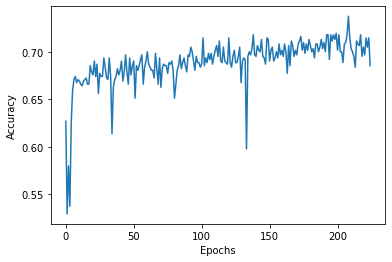

In [9]:
# Veamos cómo se desarrolla el accuracy en las iteraciones
# https://stackoverflow.com/questions/61401114/neural-network-perceptron-visualizing-decision-boundary-as-a-hyperplane-wh

import matplotlib.pyplot as plt #cargamos paquete para graficar

epochs = range(len(history.epoch))  #creamos un vector rango de 0 a 255

# Nota si inspeccionamos print(history.history) veremos que esta lista contiene:
# loss, acc, val_loss, val_acc

plt.figure()
#plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')



Text(0, 0.5, 'Loss')

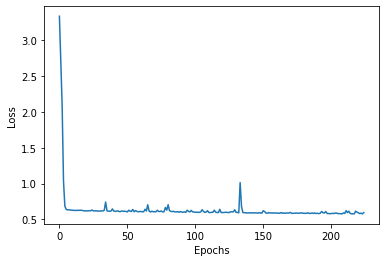

In [10]:
# Veamos un plot de la funcion de perdida a traves de las iteraciones

plt.figure()
plt.plot(epochs, history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [37]:
# ¿podemos ver los pesos sinápticos finales?

#extract weights and bias from model
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

#w1 = weights[0][0] #a
#w2 = weights[1][0] #b
#w3 = weights[2][0] #c
#b = biases[0]      #d

In [38]:
print(biases)

array([0.], dtype=float32)

In [43]:
print(weights)

[[-0.5204925 ]
 [-0.5555905 ]
 [-0.7249668 ]
 [ 0.04434514]
 [-0.01109201]
 [-0.44990337]
 [ 0.19209158]
 [-0.38743228]]


In [41]:
# Que interesante!  
# De que manera se podrian interpretar estos pesos?

0.0